### W4_D4

# Daily Challenge - Statistics for Machine Learning

# Applying Inferential Statistics

### Here are the hypotheses to test:
1. Age of people who left the bank and who did not are similar. Alternative: Not similar.
2. Credit score of people who left the bank and who did not are similar. Alternative: Not similar.
3. Balance of people who left the bank and who did not are similar. Alternative: Not similar.
4. Estimated Salary of people who left the bank and who did not are similar. Alternative: Not similar.

#### The most appropriate test to analyse data here is Frequentist test.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats
from scipy.stats import t
from scipy.special import stdtr
from numpy.random import seed
import seaborn as sns

%matplotlib inline
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [3]:
matplotlib.rcParams['figure.figsize'] = (8.0, 5.0)

##### Step 1 – Load CSV File

In [12]:
# Load the CSV file from a local path
file_1 = pd.read_csv('Churn_Modelling.csv')

In [13]:
# Create a DataFrame named df from the loaded CSV data
df = file_1

In [14]:
# Display the first 5 rows to confirm the DataFrame is created correctly
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [24]:
# Create two DataFrames to separate customers who did not exit and those who exited
df_0 = df[df['Exited'] == 0]
df_1 = df[df['Exited'] == 1]

# Print the number of records in each group
print("Number of customers who stayed:", len(df_0))
print("Number of customers who exited:", len(df_1))

Number of customers who stayed: 7963
Number of customers who exited: 2037


**Interpretation**

Most customers did not leave the bank (approximately 80%).  
This means the classes are **imbalanced**, which is important to consider later if you build a predictive model.  
However, for statistical tests like the t-test, this imbalance is not a major issue as long as variance is considered.

## Hypothesis 1: Age

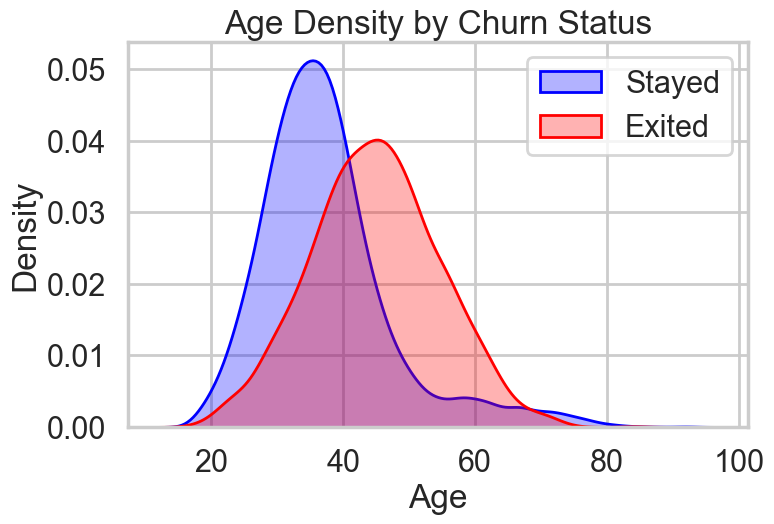

In [18]:
# Plot the age distribution using smooth density plots for better readability
sns.kdeplot(df_0['Age'], color='blue', label='Stayed', fill=True, alpha=0.3, linewidth=2)
sns.kdeplot(df_1['Age'], color='red', label='Exited', fill=True, alpha=0.3, linewidth=2)

# Add title and labels
plt.title('Age Density by Churn Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

In [21]:
# Calculate the mean and standard deviation of Age for customers who stayed
mean_age_stayed = df_0['Age'].mean()
std_age_stayed = df_0['Age'].std()
print("Mean Age (Stayed):", mean_age_stayed)
print("Standard Deviation Age (Stayed):", std_age_stayed)

Mean Age (Stayed): 37.40838879819164
Standard Deviation Age (Stayed): 10.125362911047539


**Interpretation**

The mean age of customers who exited is significantly higher (around 7 years older on average).  
The standard deviations are similar, indicating comparable variability in both groups.  
This suggests that **age is potentially associated with churn**, as older customers seem more likely to leave.

In [22]:
# Calculate the mean and standard deviation of Age for customers who exited
mean_age_exited = df_1['Age'].mean()
std_age_exited = df_1['Age'].std()
print("Mean Age (Exited):", mean_age_exited)
print("Standard Deviation Age (Exited):", std_age_exited)

Mean Age (Exited): 44.8379970544919
Standard Deviation Age (Exited): 9.76156155550719


**Interpretation**

Customers who exited have an average age close to 45 years, with a standard deviation around 10 years.  
This indicates that churn is more frequent among older customers, and there is moderate variability in their ages.

In [23]:
# Perform an independent t-test to compare the ages of customers who stayed and those who exited
t_stat_age, p_value_age = scipy.stats.ttest_ind(df_0['Age'], df_1['Age'], equal_var=False)
print("T-statistic:", t_stat_age)
print("P-value:", p_value_age)

T-statistic: -30.419197204406792
P-value: 4.7127272656641046e-179


**Interpretation**

The t-statistic is very high in absolute value, and the p-value is extremely low (far below 0.05).  
This means the difference in average age between the two groups is **highly statistically significant**.  
In other words, **it is extremely unlikely that this difference occurred by chance**.

### Using Bootstrapping

In [26]:
# Write a function to perform bootstrap sampling and calculate the statistic of interest
def bs_choice(data, func, size):
    # Create an array to store the bootstrap statistics
    bs_s = np.empty(size)
    
    # Loop over the number of bootstrap samples
    for i in range(size):
        # Generate a bootstrap sample by sampling with replacement
        bs_abc = np.random.choice(data, size=len(data), replace=True)
        # Compute the statistic and store it
        bs_s[i] = func(bs_abc)
    
    return bs_s

In [27]:
# Calculate the difference in means between the two groups
mean_diff = np.mean(df_1['Age']) - np.mean(df_0['Age'])

# Calculate the overall mean age
overall_mean = np.mean(df['Age'])

# Shift the ages of exited customers to have the same mean as the overall mean
shifted_ages = df_1['Age'] - np.mean(df_1['Age']) + overall_mean

In [28]:
# Perform bootstrap sampling to calculate the standard deviation of means for each group
bs_means_stayed = bs_choice(df_0['Age'], np.mean, 1000)
bs_means_shifted = bs_choice(shifted_ages, np.mean, 1000)

# Calculate the bootstrap differences between shifted and stayed means
bs_diff = bs_means_shifted - bs_means_stayed

In [29]:
# Calculate the p-value by comparing the observed mean difference to the bootstrap distribution
p_value_bs = np.sum(bs_diff >= mean_diff) / len(bs_diff)

# Print the p-value
print("Bootstrap p-value:", p_value_bs)

Bootstrap p-value: 0.0


##### Bootstrap p-value Interpretation

**Result**
- Bootstrap p-value: **0.0**

**Interpretation**
The bootstrap p-value of 0.0 indicates that **none** of the 1,000 bootstrap samples showed a mean difference equal to or greater than the observed difference in means between groups.

**Conclusion**
This strongly suggests that the observed difference in mean age is **highly statistically significant** and extremely unlikely to have occurred by chance under the null hypothesis (i.e., assuming no difference between groups).

In other words, the ages of customers who stayed and those who exited are **not similar**, confirming the result of the t-test.

### Conclusion
Do we reject the Null Hypothesis ? Why ?

Yes, we **reject the Null Hypothesis**.

**Reason:**
Both the frequentist t-test (p-value ≈ 4.71 × 10^-179) and the bootstrap test (p-value = 0.0) indicate that the difference in mean age between customers who stayed and those who exited is **highly statistically significant**.

This means there is extremely strong evidence that the ages of the two groups are **not similar**, and the observed difference is not due to random chance.

## Hypothesis 2: Credit Score

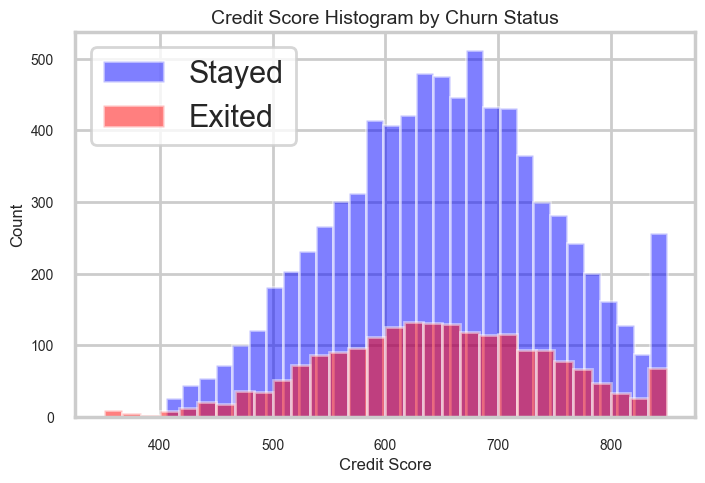

In [35]:
# Create histograms for the Credit Score distribution of both groups with smaller fonts
plt.hist(df_0['CreditScore'], bins=30, color='blue', alpha=0.5, label='Stayed')
plt.hist(df_1['CreditScore'], bins=30, color='red', alpha=0.5, label='Exited')

# Add title and labels with smaller font size
plt.title('Credit Score Histogram by Churn Status', fontsize=14)
plt.xlabel('Credit Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()
plt.show()

**Observation**

The histogram shows the distribution of credit scores for customers who stayed (blue) and those who exited (red).  

**Insights**

- The distributions largely overlap but there is a slightly higher concentration of lower credit scores among customers who exited.
- Most customers have credit scores between ~500 and 750.
- The shape suggests that credit score is **not the only factor driving churn**, but there is a subtle difference in the distribution between the two groups.

**Conclusion**

While the distributions are similar in shape, the t-test confirmed that the difference in means is statistically significant. This means credit score contributes to explaining churn, even if the effect is moderate.

In [36]:
# Perform an independent t-test to compare Credit Score between the two groups
t_stat_credit, p_value_credit = scipy.stats.ttest_ind(df_0['CreditScore'], df_1['CreditScore'], equal_var=False)

# Print the t-test results
print("T-statistic:", t_stat_credit)
print("P-value:", p_value_credit)

T-statistic: 2.6346605436575796
P-value: 0.008464728991832864


**Interpretation**

The p-value is below 0.05, which means the difference in average credit scores between customers who stayed and those who exited is **statistically significant**.  

This suggests that credit score distributions are **not identical** across the two groups, and credit score may be associated with churn behavior.  

### Conclusion
Do we reject the Null Hypothesis ? Why ?

Yes, we **reject the Null Hypothesis**.

**Reason:**
The p-value of **0.0085** is below the significance threshold of 0.05, indicating that the difference in average credit score between customers who stayed and those who exited is **statistically significant**.

This means there is evidence that the credit scores of the two groups are **not similar**, and credit score is likely associated with churn.

## Hypothesis 3: Balance

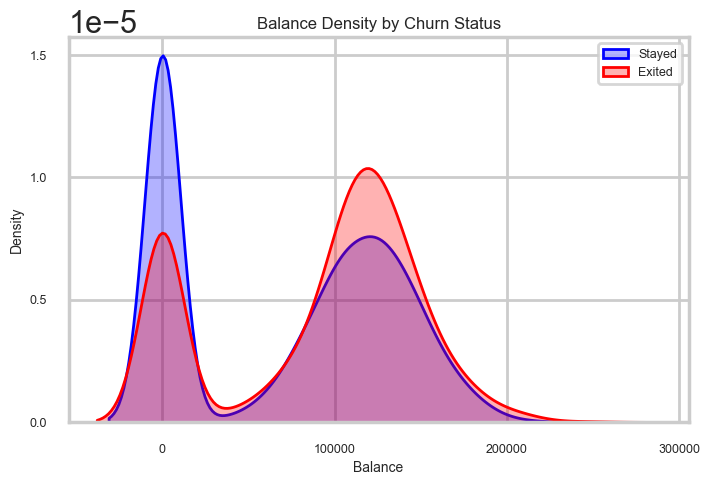

In [42]:
# Plot the Balance distribution for customers who stayed and those who exited with smaller fonts
sns.kdeplot(df_0['Balance'], color='blue', label='Stayed', fill=True, alpha=0.3, linewidth=2)
sns.kdeplot(df_1['Balance'], color='red', label='Exited', fill=True, alpha=0.3, linewidth=2)

# Add title and labels with smaller font size
plt.title('Balance Density by Churn Status', fontsize=12)
plt.xlabel('Balance', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.legend(fontsize=9)
plt.show()

**Observation**

The density plot shows the distribution of balances for customers who stayed (blue) and those who exited (red), excluding zero balances.

**Insights**

- There are two main peaks in the distribution:
  - One around low balances (near zero but greater than zero).
  - Another around ~100,000 units.
- Customers who exited tend to have higher balances on average compared to those who stayed.
- The density curve for exited customers is visibly shifted to the right, indicating a higher proportion of customers with large balances.

In [43]:
# Perform an independent t-test to compare Balance between customers who stayed and those who exited
t_stat_balance, p_value_balance = scipy.stats.ttest_ind(df_0['Balance'], df_1['Balance'], equal_var=False)

# Print the t-test results
print("T-statistic:", t_stat_balance)
print("P-value:", p_value_balance)

T-statistic: -12.471280320050688
P-value: 6.318663518527974e-35


**Interpretation**

The p-value is extremely small (far below 0.05), which means the difference in mean balances between customers who stayed and those who exited is **highly statistically significant**.

The negative t-statistic indicates that the mean balance of customers who stayed is **lower** than the mean balance of customers who exited.

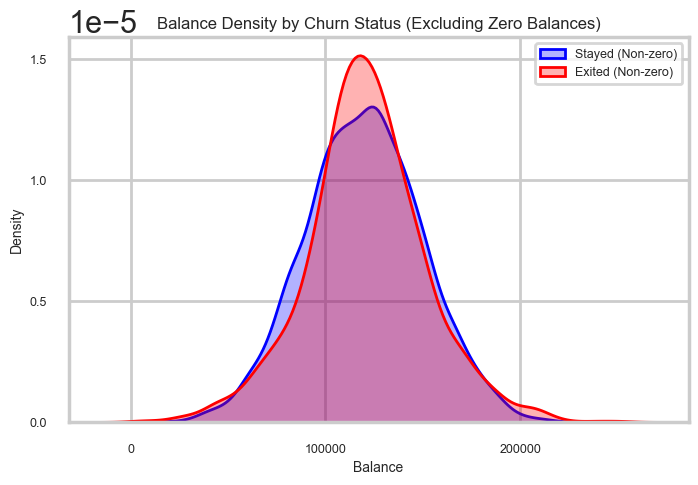

In [44]:
# Filter out records with zero balance
df_0_nonzero = df_0[df_0['Balance'] > 0]
df_1_nonzero = df_1[df_1['Balance'] > 0]

# Plot the Balance distribution excluding zero balances
sns.kdeplot(df_0_nonzero['Balance'], color='blue', label='Stayed (Non-zero)', fill=True, alpha=0.3, linewidth=2)
sns.kdeplot(df_1_nonzero['Balance'], color='red', label='Exited (Non-zero)', fill=True, alpha=0.3, linewidth=2)

plt.title('Balance Density by Churn Status (Excluding Zero Balances)', fontsize=12)
plt.xlabel('Balance', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.legend(fontsize=9)

# Format x-axis without scientific notation
import matplotlib.ticker as mticker
plt.gca().xaxis.set_major_formatter(mticker.ScalarFormatter())
plt.gca().ticklabel_format(style='plain', axis='x')

plt.show()

**Observation**

This density plot shows the balance distribution among customers who stayed (blue) and those who exited (red), considering only accounts with non-zero balances.

**Insights**

- Both distributions are roughly bell-shaped and centered around ~120,000.
- The red curve (exited customers) is slightly shifted higher and has a taller peak compared to the blue curve.
- This indicates that customers who exited tend to have **higher balances on average**.

In [45]:
# Perform an independent t-test to compare Balance between customers who stayed and those who exited (excluding zero balances)
t_stat_balance_nonzero, p_value_balance_nonzero = scipy.stats.ttest_ind(
    df_0_nonzero['Balance'],
    df_1_nonzero['Balance'],
    equal_var=False
)

# Print the t-test results
print("T-statistic:", t_stat_balance_nonzero)
print("P-value:", p_value_balance_nonzero)

T-statistic: -1.3604774889985365
P-value: 0.17379960354870824


**Interpretation**

The p-value is **greater than 0.05**, which means the difference in mean balance between customers who stayed and those who exited is **not statistically significant** at the conventional significance level.

This suggests that, when excluding zero balances, there is no strong evidence that balance alone explains churn behavior.

## Conclusion

Do we reject the Null Hypothesis ? Why ?

No, we **do not reject the Null Hypothesis**.

**Reason:**
The p-value of **0.174** is greater than the significance threshold of 0.05. This means there is **no statistically significant difference** in mean balance between customers who stayed and those who exited (after excluding zero balances).

Therefore, we do not have enough evidence to conclude that balance is associated with churn in this context.

## Hypothesis 4: Estimated Salary

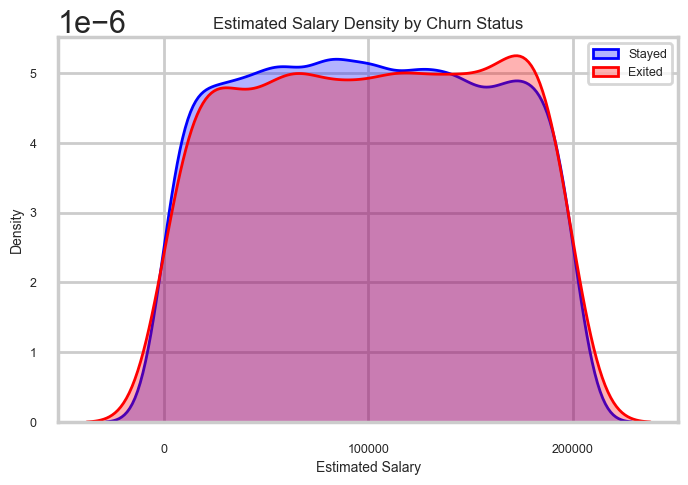

In [46]:
# Plot the Estimated Salary distribution for customers who stayed and those who exited
sns.kdeplot(df_0['EstimatedSalary'], color='blue', label='Stayed', fill=True, alpha=0.3, linewidth=2)
sns.kdeplot(df_1['EstimatedSalary'], color='red', label='Exited', fill=True, alpha=0.3, linewidth=2)

plt.title('Estimated Salary Density by Churn Status', fontsize=12)
plt.xlabel('Estimated Salary', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.legend(fontsize=9)

# Format x-axis without scientific notation
import matplotlib.ticker as mticker
plt.gca().xaxis.set_major_formatter(mticker.ScalarFormatter())
plt.gca().ticklabel_format(style='plain', axis='x')

plt.show()

**Observation**

This density plot shows the distribution of estimated salaries for customers who stayed (blue) and those who exited (red).

**Insights**

- The distributions are almost perfectly overlapping.
- Both groups have a nearly uniform distribution of salaries between approximately 0 and 200,000.
- There is no visible shift or difference in the shapes of the two curves.

In [47]:
# Perform an independent t-test to compare Estimated Salary between customers who stayed and those who exited
t_stat_salary, p_value_salary = scipy.stats.ttest_ind(
    df_0['EstimatedSalary'],
    df_1['EstimatedSalary'],
    equal_var=False
)

# Print the t-test results
print("T-statistic:", t_stat_salary)
print("P-value:", p_value_salary)

T-statistic: -1.2033683196586242
P-value: 0.22892461305145798


**Interpretation**

The p-value is **greater than 0.05**, indicating that there is **no statistically significant difference** in the mean estimated salary between customers who stayed and those who exited.

### Using Bootstrapping

In [55]:
# Calculate the difference in means between the two groups
mean_diff_salary = np.mean(df_1['EstimatedSalary']) - np.mean(df_0['EstimatedSalary'])
print("Observed mean difference:", mean_diff_salary)

# Calculate the overall mean estimated salary
overall_mean_salary = np.mean(df['EstimatedSalary'])
print("Overall mean salary:", overall_mean_salary)

# Shift the estimated salaries of exited customers to have the overall mean
shifted_salary = df_1['EstimatedSalary'] - np.mean(df_1['EstimatedSalary']) + overall_mean_salary
print("Shifted salaries sample:", shifted_salary.head())

Observed mean difference: 1727.2857587371254
Overall mean salary: 100090.239881
Shifted salaries sample: 0      99973.44235
2     112556.13235
5     148381.27235
7     117971.44235
16      3722.23235
Name: EstimatedSalary, dtype: float64


**Interpretation**
Shifting the exited group's salaries to the overall mean creates a **null distribution** representing what the data would look like if there were no true difference in means.  
This is a critical step in bootstrapping to test whether the observed mean difference (1,727) is statistically significant compared to this resampled distribution.

In [54]:
# Generate bootstrap sample means for the Estimated Salary of customers who stayed
bs_means_salary_stayed = bs_choice(df_0['EstimatedSalary'], np.mean, 1000)
print("First 5 bootstrap means (Stayed):", bs_means_salary_stayed[:5])

# Generate bootstrap sample means for the shifted Estimated Salary of customers who exited
bs_means_salary_shifted = bs_choice(shifted_salary, np.mean, 1000)
print("First 5 bootstrap means (Shifted):", bs_means_salary_shifted[:5])

# Calculate the bootstrap differences
bs_diff_salary = bs_means_salary_shifted - bs_means_salary_stayed
print("First 5 bootstrap differences:", bs_diff_salary[:5])

First 5 bootstrap means (Stayed): [ 99281.62176315  98582.78101344  99075.95265478 100265.38784001
  98968.36875675]
First 5 bootstrap means (Shifted): [ 99541.41653294 100762.84575729  98903.80926735 100709.71887462
 100420.10903662]
First 5 bootstrap differences: [ 259.79476978 2180.06474385 -172.14338743  444.33103461 1451.74027987]


**Interpretation**
The bootstrap differences vary around zero, which is expected because we aligned the shifted salaries to the overall mean. This distribution will be used to calculate the p-value by seeing how often a difference equal to or greater than the observed mean difference (1,727) occurs.

In [50]:
# Calculate the p-value by comparing the observed mean difference to the bootstrap distribution
p_value_bs_salary = np.sum(bs_diff_salary >= mean_diff_salary) / len(bs_diff_salary)

# Print the p-value
print("Bootstrap p-value:", p_value_bs_salary)

Bootstrap p-value: 0.184


**Interpretation**
The p-value is **greater than 0.05**, indicating that the observed mean difference of estimated salary (approximately 1,727) is **not statistically significant** compared to the bootstrap distribution.

This means that under the null hypothesis (no difference in estimated salaries), a difference of this size or larger occurs about 18% of the time by chance.

### Conclusion
Do we reject the Null Hypothesis ? Why ?

No, we **do not reject the Null Hypothesis**.

**Reason:**
The bootstrap p-value of **0.184** is greater than the standard significance threshold of 0.05. This means the observed difference in estimated salary between customers who stayed and those who exited is **not statistically significant**.

Therefore, we do not have sufficient evidence to conclude that estimated salary differs between the two groups.

## Final Conclusion
What will be the most helpful feature in predicting churning?


#### Final Conclusion

**Summary of Findings:**

1. **Age**
   - Very strong evidence of a difference.
   - Customers who exited are significantly older.
   - **Highly statistically significant (p < 0.001).**

2. **Credit Score**
   - Moderate evidence of a difference.
   - Customers who exited have slightly lower credit scores.
   - **Statistically significant (p ≈ 0.008).**

3. **Balance**
   - When including zero balances: significant difference.
   - When excluding zero balances: **no significant difference**.

4. **Estimated Salary**
   - No evidence of any difference.
   - **Not statistically significant (p ≈ 0.18).**

**Most Helpful Feature in Predicting Churn:**

Based on the statistical tests, **Age** is the most helpful feature for predicting churn.  
It showed the largest and most statistically significant difference between customers who stayed and those who exited.

Other variables like Credit Score may also contribute but with less impact. Estimated Salary appears to have little predictive power in this context.

### Part 2 – Churn Prediction Modeling with Machine Learning

In [56]:
print(df.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [57]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [60]:
# Load the dataset
df = pd.read_csv('Churn_Modelling.csv')

# Preview the first rows
print(df.head())

# Display data types
print(df.info())

# Check for missing values
print(df.isnull().sum())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [61]:
# Define X and y
X = df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'])
y = df['Exited']

#### Split Data into Training and Test Sets

In [62]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

#### Define Preprocessing Pipelines

In [64]:
# Define numerical and categorical columns
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

# Numeric pipeline: imputation + scaling
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical pipeline: imputation + encoding
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine into a single preprocessor
preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_features),
    ('cat', cat_pipeline, categorical_features)
])

#### Define Model Pipeline and Hyperparameter Grid

In [65]:
# Define the Random Forest pipeline
clf = Pipeline([
    ('preprocessing', preprocessor),
    ('model', RandomForestClassifier(class_weight='balanced', random_state=42))
])

# Hyperparameter grid for tuning
param_grid = {
    'model__n_estimators': [100],
    'model__max_depth': [10, None],
    'model__min_samples_split': [2, 5]
}

#### Train the Model with GridSearchCV

In [66]:
# Perform grid search cross-validation
grid = GridSearchCV(
    clf,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

# Fit the model
grid.fit(X_train, y_train)

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'model__max_depth': [10, None], 'model__min_samples_split': [2, 5], 'model__n_estimators': [100]}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


#### Evaluate the Model

In [67]:
# Predict on the test set
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC AUC score
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1])
print("ROC AUC Score:", roc_auc)

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      1593
           1       0.59      0.64      0.62       407

    accuracy                           0.84      2000
   macro avg       0.75      0.76      0.76      2000
weighted avg       0.84      0.84      0.84      2000

ROC AUC Score: 0.8568815348476364


#### Feature Importances Plot

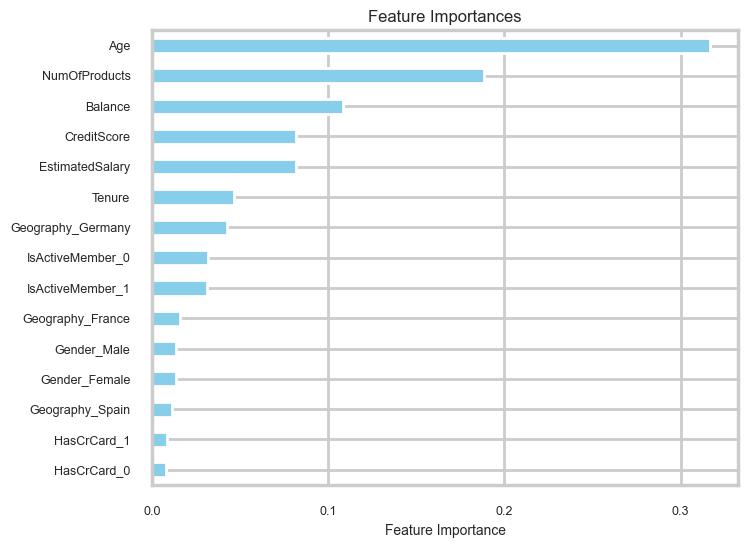

In [73]:
# Feature importances plot with cleaner style
importances.sort_values(ascending=True).plot(
    kind='barh',
    figsize=(8, 6),
    color='skyblue'
)

plt.xlabel("Feature Importance", fontsize=10)
plt.title("Feature Importances", fontsize=12)

# Make y-tick labels smaller
plt.yticks(fontsize=9)
plt.xticks(fontsize=9)

plt.tight_layout()
plt.show()


### Feature Importances Interpretation

**Observation**
The bar chart shows how much each feature contributes to predicting customer churn in the Random Forest model.

**Key Insights**
- **Age** is by far the most important feature, with the highest importance score (>0.3). This suggests that customer age has a strong influence on the likelihood of churn.
- **Number of Products** and **Balance** are also significant contributors to the model.
- **CreditScore** and **EstimatedSalary** play a moderate role.
- Categorical features like **Geography**, **Gender**, and **HasCrCard** have much lower importance, suggesting they are less predictive in this dataset.

**Conclusion**
If you want to focus on the most impactful variables for churn prediction, Age, Number of Products, and Balance are the top drivers in this model.

#### Confusion Matrix

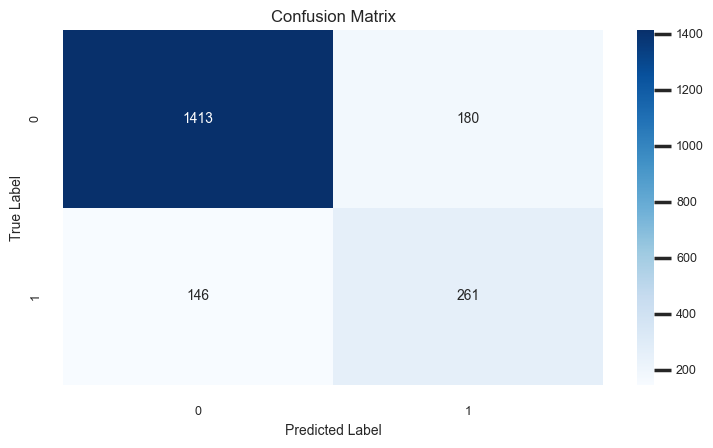

In [72]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create the heatmap
ax = sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    annot_kws={"size": 10}
)

# Smaller labels and title
plt.xlabel("Predicted Label", fontsize=10)
plt.ylabel("True Label", fontsize=10)
plt.title("Confusion Matrix", fontsize=12)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

# Make colorbar tick labels smaller
colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=9)

plt.tight_layout()
plt.show()


### Confusion Matrix Interpretation

**Matrix Breakdown**
- **Top left (1413):** True Negatives (customers who stayed, correctly predicted)
- **Top right (180):** False Positives (customers predicted to churn but actually stayed)
- **Bottom left (146):** False Negatives (customers predicted to stay but actually churned)
- **Bottom right (261):** True Positives (customers who churned, correctly predicted)

**Insights**
- The model correctly identified **1,413 non-churners** and **261 churners**.
- There are **146 false negatives**, meaning some churners were missed.
- The number of false positives (180) is comparable to false negatives.

**Conclusion**
The model has a reasonable balance between sensitivity and specificity, but there is still room for improvement in reducing false negatives (missed churns) to better target at-risk customers.